# Run ML algorithms

In [1]:
# Import Stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay

In [2]:
pheme = pd.read_csv('pheme.csv')
politifact = pd.read_csv('politifact.csv')


In [3]:
politifact.head()

,Unnamed: 0,verdict,statement_originator,statement,statement_date,statement_source,factchecker,factcheck_date,factcheck_analysis_link
0,0,True,Barack Obama,john mccain opposed bankruptcy protections for...,6/11/2008,speech,Adriel Bettelheim,6/16/2008,https://www.politifact.com/factchecks/2008/jun...
1,1,False,Matt Gaetz,bennie thompson actively cheer led riots in t...,6/7/2022,television,Yacob Reyes,6/13/2022,https://www.politifact.com/factchecks/2022/jun...
2,2,True,Kelly Ayotte,says maggie hassan was out of state on day...,5/18/2016,news,Clay Wirestone,5/27/2016,https://www.politifact.com/factchecks/2016/may...
3,3,False,Bloggers,busted cdc inflated covid numbers accused o...,2/1/2021,blog,Madison Czopek,2/5/2021,https://www.politifact.com/factchecks/2021/feb...
4,4,True,Bobby Jindal,i am the only republican candidate that has...,8/30/2015,television,Linda Qiu,8/30/2015,https://www.politifact.com/factchecks/2015/aug...


In [4]:
# Prep data / Encode text

tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
#Fix this - encode the datasets together
pheme_tf = tfidf.fit_transform(pheme['text'].values)
polit_tf = tfidf.fit_transform(politifact['statement'].values)

cv = CountVectorizer()
X_cv = cv.fit_transform(pheme['text'].values)

In [5]:
# Select encoding
X = pheme_tf
#X = X_cv
y = pheme['target']

rs = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = rs)

"""
X_train = pheme_tf
y_train = pheme['target']
X_test = polit_tf
y_test = politifact['verdict']
"""
# Set no. of folds
num_folds = 10

###Things to do: add more features

In [6]:
print(polit_tf.shape)

(21152, 16423)


In [7]:
# Model running function
def run_model_after_gridsearch(best_estimators, X_train, y_train, X_test, y_test):
    mod = best_estimators
    mod.fit(X_train, y_train)
    pred_y = mod.predict(X_test)
    acc_mod = accuracy_score(y_test, pred_y)
    print("Accuracy:", float("{0:.2f}".format(acc_mod*100)), "%")
    f1_mod = f1_score(y_test, pred_y, average="macro")
    print("F1:", f1_mod)
    cm = confusion_matrix(y_test, pred_y)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["true", "false"])
    disp.plot()
    plt.show()  

In [8]:
def run_model_manually(model, X_test, y_test):
    pred_y = model.predict(X_test)
    acc_mod = accuracy_score(y_test, pred_y)
    print("Accuracy:", float("{0:.2f}".format(acc_mod*100)), "%")
    f1_mod = f1_score(y_test, pred_y, average="macro")
    print("F1:", float("{0:.2f}".format(f1_mod*100)), "%")
    cm = confusion_matrix(y_test, pred_y)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["true", "false"])
    disp.plot()
    plt.show() 

In [9]:
# SVM

# Tune hyperparameters
param_grid = {'C': [10**x for x in range(-1, 8, 1)], 
              'gamma': [10**x for x in range(1, -8, -1)]} 
# Set verbose = 3 here for more info              
grid = GridSearchCV(SVC(random_state = rs), param_grid, refit=True, cv=num_folds, verbose = 3)
grid.fit(X_train, y_train)
print(f"The best parameters for SVM are: {grid.best_params_}")

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV 1/10] END ..................C=0.1, gamma=10;, score=0.552 total time=   0.2s
[CV 2/10] END ..................C=0.1, gamma=10;, score=0.556 total time=   0.2s
[CV 3/10] END ..................C=0.1, gamma=10;, score=0.556 total time=   0.1s
[CV 4/10] END ..................C=0.1, gamma=10;, score=0.556 total time=   0.1s
[CV 5/10] END ..................C=0.1, gamma=10;, score=0.556 total time=   0.2s
[CV 6/10] END ..................C=0.1, gamma=10;, score=0.556 total time=   0.2s
[CV 7/10] END ..................C=0.1, gamma=10;, score=0.550 total time=   0.1s
[CV 8/10] END ..................C=0.1, gamma=10;, score=0.550 total time=   0.2s
[CV 9/10] END ..................C=0.1, gamma=10;, score=0.550 total time=   0.2s
[CV 10/10] END .................C=0.1, gamma=10;, score=0.550 total time=   0.2s
[CV 1/10] END ...................C=0.1, gamma=1;, score=0.558 total time=   0.1s
[CV 2/10] END ...................C=0.1, gamma=

Accuracy: 84.86 %
F1: 84.67 %


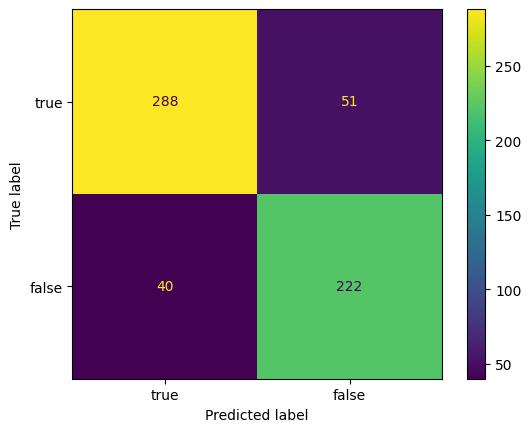

In [18]:
# Run model with best results
#run_model_after_gridsearch(grid.best_estimator_, X_train, y_train, X_test, y_test)

#Run model manually
svm = SVC(random_state = rs, C=1, gamma=1)
svm.fit(X_train, y_train)
run_model_manually(svm, X_test, y_test)

In [11]:
# KNN

# Tune hyperparameters
param_grid = {'n_neighbors': np.arange(2, 15, 1)} 
# Set verbose = 3 here for more info  
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, cv=num_folds, verbose=3)
grid.fit(X_train, y_train)
print(f"The best parameters for KNN are: {grid.best_params_}")

Fitting 10 folds for each of 13 candidates, totalling 130 fits
[CV 1/10] END ....................n_neighbors=2;, score=0.834 total time=   0.1s
[CV 2/10] END ....................n_neighbors=2;, score=0.822 total time=   0.0s
[CV 3/10] END ....................n_neighbors=2;, score=0.789 total time=   0.0s
[CV 4/10] END ....................n_neighbors=2;, score=0.894 total time=   0.0s
[CV 5/10] END ....................n_neighbors=2;, score=0.867 total time=   0.0s
[CV 6/10] END ....................n_neighbors=2;, score=0.828 total time=   0.0s
[CV 7/10] END ....................n_neighbors=2;, score=0.878 total time=   0.0s
[CV 8/10] END ....................n_neighbors=2;, score=0.867 total time=   0.0s
[CV 9/10] END ....................n_neighbors=2;, score=0.806 total time=   0.0s
[CV 10/10] END ...................n_neighbors=2;, score=0.844 total time=   0.0s
[CV 1/10] END ....................n_neighbors=3;, score=0.851 total time=   0.0s
[CV 2/10] END ....................n_neighbors=

Accuracy: 87.19 %
F1: 0.8709872567960502


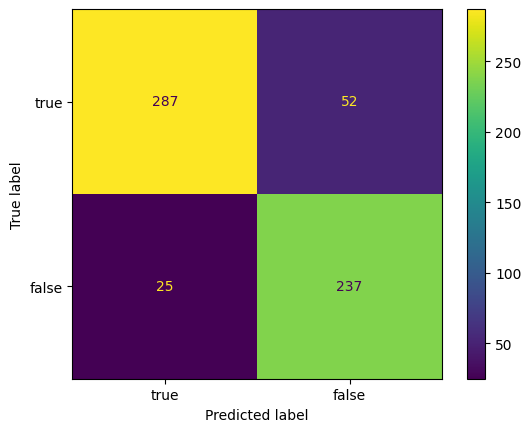

In [12]:
# Run model with best results
run_model_after_gridsearch(grid.best_estimator_, X_train, y_train, X_test, y_test)

In [13]:
# Logistic Regression

# Tune hyperparameters
param_grid = {'C': [10**x for x in range(-1, 8, 1)]} 
# Set verbose = 3 here for more info  
grid = GridSearchCV(LogisticRegression(solver = 'lbfgs', max_iter=10000), param_grid, refit=True, cv=num_folds, verbose=3)
grid.fit(X_train, y_train)
print(f"The best parameters for Logistic Regression are: {grid.best_params_}")

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ............................C=0.1;, score=0.746 total time=   0.0s
[CV 2/10] END ............................C=0.1;, score=0.739 total time=   0.0s
[CV 3/10] END ............................C=0.1;, score=0.756 total time=   0.0s
[CV 4/10] END ............................C=0.1;, score=0.800 total time=   0.0s
[CV 5/10] END ............................C=0.1;, score=0.761 total time=   0.0s
[CV 6/10] END ............................C=0.1;, score=0.689 total time=   0.0s
[CV 7/10] END ............................C=0.1;, score=0.822 total time=   0.0s
[CV 8/10] END ............................C=0.1;, score=0.778 total time=   0.0s
[CV 9/10] END ............................C=0.1;, score=0.744 total time=   0.0s
[CV 10/10] END ...........................C=0.1;, score=0.772 total time=   0.0s
[CV 1/10] END ..............................C=1;, score=0.840 total time=   0.0s
[CV 2/10] END ..............................C=1;

Accuracy: 84.36 %
F1: 0.8405529589740116


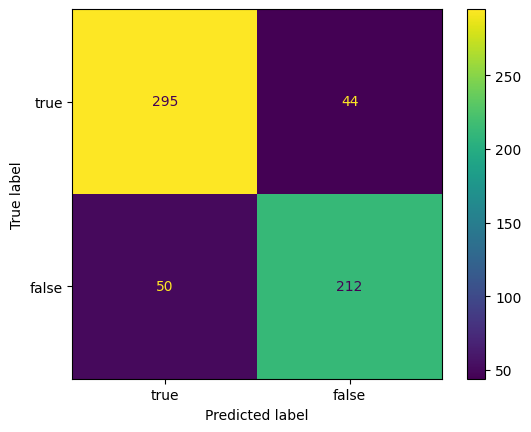

In [14]:
# Run model with best results
run_model_after_gridsearch(grid.best_estimator_, X_train, y_train, X_test, y_test)

In [15]:
# AdaBoost

# Tune hyperparameters
param_grid = {'learning_rate': [10**x for x in range(1,-6, -1)],
              'n_estimators': [1000]} 
# Set verbose = 3 here for more info  
grid = GridSearchCV(AdaBoostClassifier(n_estimators = 200, random_state = rs), param_grid, refit=True, cv=num_folds, verbose=3)
grid.fit(X_train, y_train)
print(f"The best parameters for AdaBoost are: {grid.best_params_}")

Fitting 10 folds for each of 35 candidates, totalling 350 fits
[CV 1/10] END learning_rate=10, n_estimators=100;, score=0.552 total time=   1.0s
[CV 2/10] END learning_rate=10, n_estimators=100;, score=0.550 total time=   1.0s
[CV 3/10] END learning_rate=10, n_estimators=100;, score=0.556 total time=   1.0s
[CV 4/10] END learning_rate=10, n_estimators=100;, score=0.556 total time=   1.0s
[CV 5/10] END learning_rate=10, n_estimators=100;, score=0.556 total time=   1.0s
[CV 6/10] END learning_rate=10, n_estimators=100;, score=0.561 total time=   0.9s
[CV 7/10] END learning_rate=10, n_estimators=100;, score=0.550 total time=   0.9s
[CV 8/10] END learning_rate=10, n_estimators=100;, score=0.550 total time=   0.9s
[CV 9/10] END learning_rate=10, n_estimators=100;, score=0.550 total time=   0.9s
[CV 10/10] END learning_rate=10, n_estimators=100;, score=0.550 total time=   0.9s
[CV 1/10] END learning_rate=10, n_estimators=250;, score=0.552 total time=   2.4s
[CV 2/10] END learning_rate=10, n_

Accuracy: 82.36 %
F1: 0.8227197845009906


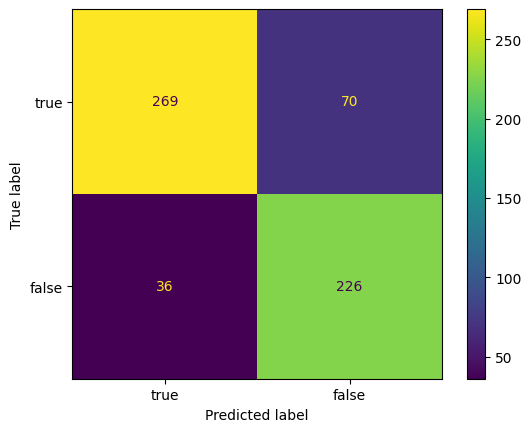

In [16]:
# Run model with best results
run_model_after_gridsearch(grid.best_estimator_, X_train, y_train, X_test, y_test)